# 1. Installing required packages

In [389]:
!pip install prophet

import prophet

# 2. Importing Data

In [390]:
import pandas as pd

In [391]:
data_path = "/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/5. Volume Predictions/Service Volumes.csv"

df = pd.read_csv(data_path)

df.head()

,SERVICE A DATE,SERVICE A,SERVICE B
0,1/1/2015,45760,37160
1,2/1/2015,35780,41480
2,3/1/2015,38300,44520
3,4/1/2015,40000,43040
4,5/1/2015,32500,37960


In [392]:
# converting string date to a datetime object
df['SERVICE A DATE'] = pd.to_datetime(df['SERVICE A DATE'])

# setting the date field as index
df.set_index('SERVICE A DATE', inplace=True)

df = df.resample('M').first()

df.head()

,SERVICE A,SERVICE B
SERVICE A DATE,,
2015-01-31,45760,37160
2015-02-28,35780,41480
2015-03-31,38300,44520
2015-04-30,40000,43040
2015-05-31,32500,37960


In [393]:
# creating 2 dataframes for 2 models
df_A = df.copy()
df_B = df.copy()

# 3. Training Prophet Model

In [394]:
from prophet import Prophet

## 3.1 Training Model A

In [395]:
df_A = df_A.drop(['SERVICE B'], axis=1)

df_A.reset_index(inplace=True)

df_A = df_A.rename(columns={'SERVICE A DATE': 'ds', 'SERVICE A': 'y'})

In [396]:
model_A = Prophet()

model_A.fit(df_A)

future_A = model_A.make_future_dataframe(periods=20, freq='M')

forecast_A = model_A.predict(future_A)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiupxm19/4x3tvo0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiupxm19/_yzluhuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65145', 'data', 'file=/tmp/tmpeiupxm19/4x3tvo0g.json', 'init=/tmp/tmpeiupxm19/_yzluhuy.json', 'output', 'file=/tmp/tmpeiupxm19/prophet_modelnardaiuo/prophet_model-20230927180317.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:03:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:03:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [397]:
df_A_Predicted = forecast_A[['ds', 'yhat']].tail(20)

In [398]:
df_A_Predicted

,ds,yhat
99,2023-04-30,68560.779484
100,2023-05-31,62967.198341
101,2023-06-30,65709.757936
102,2023-07-31,67026.003762
103,2023-08-31,66441.851650
104,2023-09-30,65574.012809
105,2023-10-31,68958.010913
106,2023-11-30,71219.452256
107,2023-12-31,65842.648426
108,2024-01-31,78311.347394


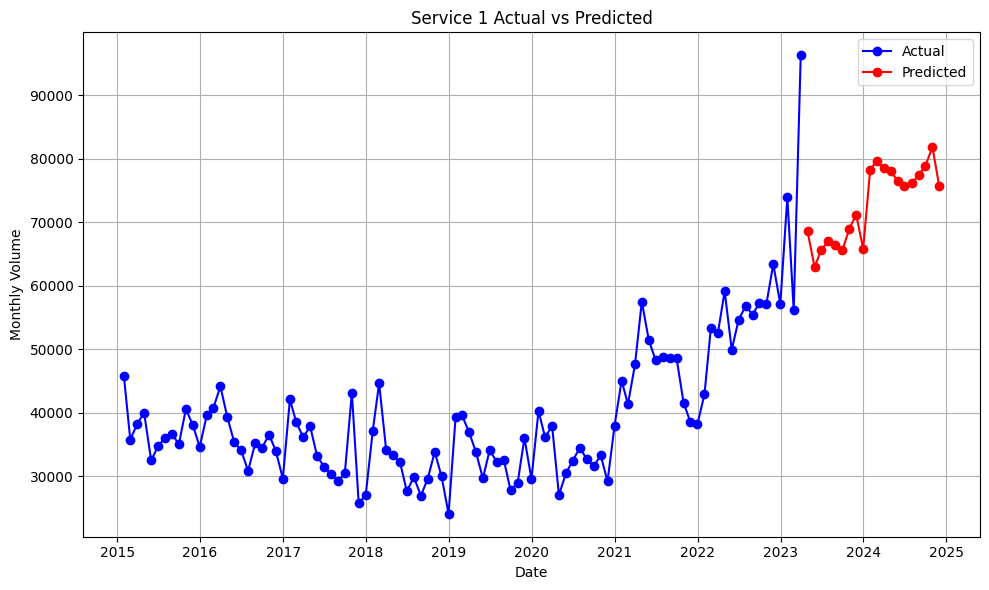

In [399]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_A['ds'], df_A['y'], label='Actual', color='blue', marker='o')

plt.plot(df_A_Predicted['ds'], df_A_Predicted['yhat'], label='Predicted', color='red', marker='o')

# Customize the plot (titles, labels, legend, etc.)
plt.title('Service 1 Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Monthly Volume')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.2 Training Model B

In [400]:
df_B.reset_index(inplace =  True)

df_B = df_B.rename(columns={'SERVICE A DATE': 'ds', 'SERVICE B': 'y'})

df_B.head()

,ds,SERVICE A,y
0,2015-01-31,45760,37160
1,2015-02-28,35780,41480
2,2015-03-31,38300,44520
3,2015-04-30,40000,43040
4,2015-05-31,32500,37960


In [401]:
df_A_Predicted = df_A_Predicted.rename(columns={'yhat': 'SERVICE A'})

df_A_Predicted.head()



,ds,SERVICE A
99,2023-04-30,68560.779484
100,2023-05-31,62967.198341
101,2023-06-30,65709.757936
102,2023-07-31,67026.003762
103,2023-08-31,66441.851650


In [402]:
model_B = Prophet()

model_B.add_regressor('SERVICE A')

model_B.fit(df_B)

forecast_B = model_B.predict(df_A_Predicted)

future_B = forecast_B[['ds','yhat']]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiupxm19/ch7tnjv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiupxm19/9uc0i8dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21792', 'data', 'file=/tmp/tmpeiupxm19/ch7tnjv5.json', 'init=/tmp/tmpeiupxm19/9uc0i8dg.json', 'output', 'file=/tmp/tmpeiupxm19/prophet_modellwmmt8m3/prophet_model-20230927180319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:03:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:03:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


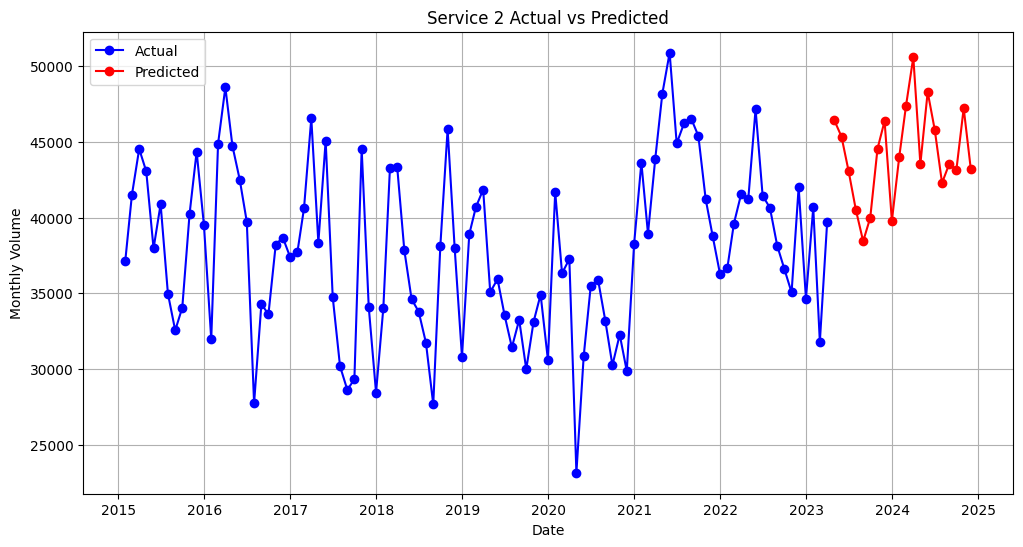

In [403]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_B['ds'], df_B['y'], label='Actual', color='blue', marker='o')


plt.plot(future_B['ds'][-20:], future_B['yhat'][-20:], label='Predicted', color='red', marker='o')

plt.xlabel('Date')
plt.ylabel('Monthly Volume')
plt.title('Service 2 Actual vs Predicted')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()